In [12]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pylab as plt

### Create a dataset using numpy Sin() function

In [4]:
x = np.arange(0, np.pi * 2, 0.1)
y = np.sin(x)

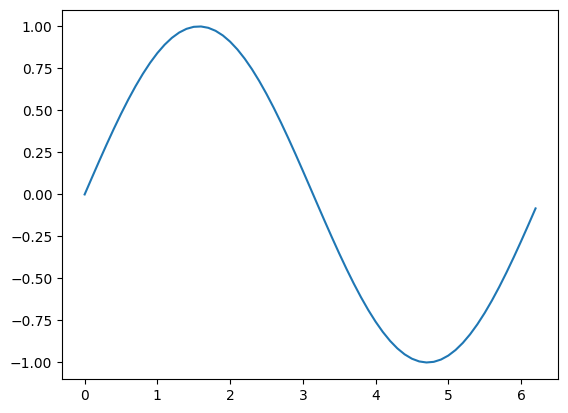

In [6]:
plt.plot(x,y)
plt.show()

## Create a Sequential NN model to train the machine to learn how to predict Sin wave.

The first dense layer uses the activation function `tanh`.

The mathematical formula for the tanh function is as follows:

$$
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

The `tanh` activation function is a common nonlinear activation function used in artificial neural networks. It is similar to the logistic sigmoid function, but has a range from -1 to 1 instead of 0 to 1. This means that the output of the tanh function is centered around 0, which can be helpful for certain types of data.

`tanh` is preferred compared to sigmoid, especially when it comes to big data when you are usually struggling to find quickly the local (or global) minimum, is that the derivatives of the tanh are larger than the derivatives of the sigmoid. In other words, you minimize your cost function faster if you use tanh as an activation fuction.

More reading:
https://stats.stackexchange.com/questions/330559/why-is-tanh-almost-always-better-than-sigmoid-as-an-activation-function

In [8]:
model = Sequential()
model.add(Dense(5, input_shape=(1,), activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='linear'))

## Compile the model 

When you compile a neural network model, you are defining the loss function, optimizer, and evaluation metrics that the model will use during training. The loss function measures how well the model is performing on the training data and determines how the weights in the network should be adjusted in order to minimize the error. The optimizer is responsible for carrying out these weight updates, using a specified learning rate to control the step size of the updates. Finally, the evaluation metrics are used to measure the performance of the model on a validation set or during inference.

Compiling the model is a necessary step before training can begin, as it sets up the backend operations required for the training process. It is therefore usually performed after constructing the model architecture and before loading in any saved weights. However, if a saved model was compiled with the same settings as the current script, you can skip compiling it again and directly load in the saved model to continue training or make predictions.

In [9]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])

## Fitting the model
This is the part where the actual training happens on your input data. We call the `fit` function of our model to start the training process

- X, y − It is a tuple to evaluate your data.
- epochs − no of times the model is needed to be evaluated during training.
- batch_size − training instances.

In [10]:
model.fit(x, y, epochs=1000, batch_size=1, verbose=1)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Evaluate the model
scores = model.evaluate(x, y, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# Make predictions
y_pred = model.predict(x)

mean_squared_error: 0.06%
2/2 [==============================] - 0s 4ms/step


20/20 [==============================] - 0s 626us/step


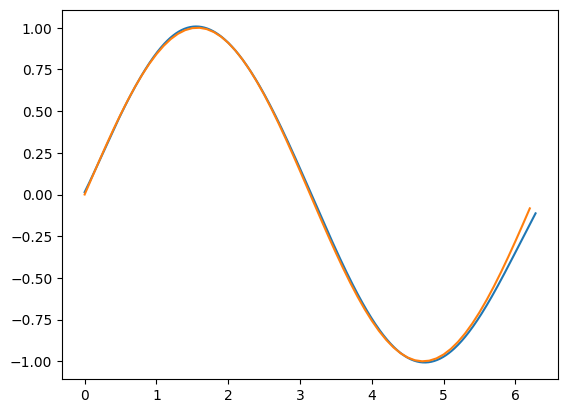

In [21]:
new_x = np.arange(0, np.pi * 2, 0.01)
y_pred = model.predict(new_x)
plt.plot(new_x,y_pred)
plt.plot(x,y)
plt.show()